Graph Constrained Unmixing w/ Normalized Cuts

In [1]:
# Imports
#import os
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
#import scipy as sp
# Configs for Notebooks
plt.rcParams["figure.figsize"] = [9,7]
np.set_printoptions(suppress=True)

# map info = {UTM, 1, 1, 612399.91, 4074739.708, 1, 1, 10, North,WGS-84}
# 36°48'42.6"N 121°44'23.5"W

In [2]:
## Extract Data
samson_path = "data/samson_full.h5"
h5_file = h5.File(samson_path, 'r')
hyperspectral_cube = np.array(h5_file['samson_full'][:])
h5_file.close()

## Get Data
nx, ny, nb = hyperspectral_cube.shape

In [3]:
print( hyperspectral_cube.shape)

(952, 952, 156)


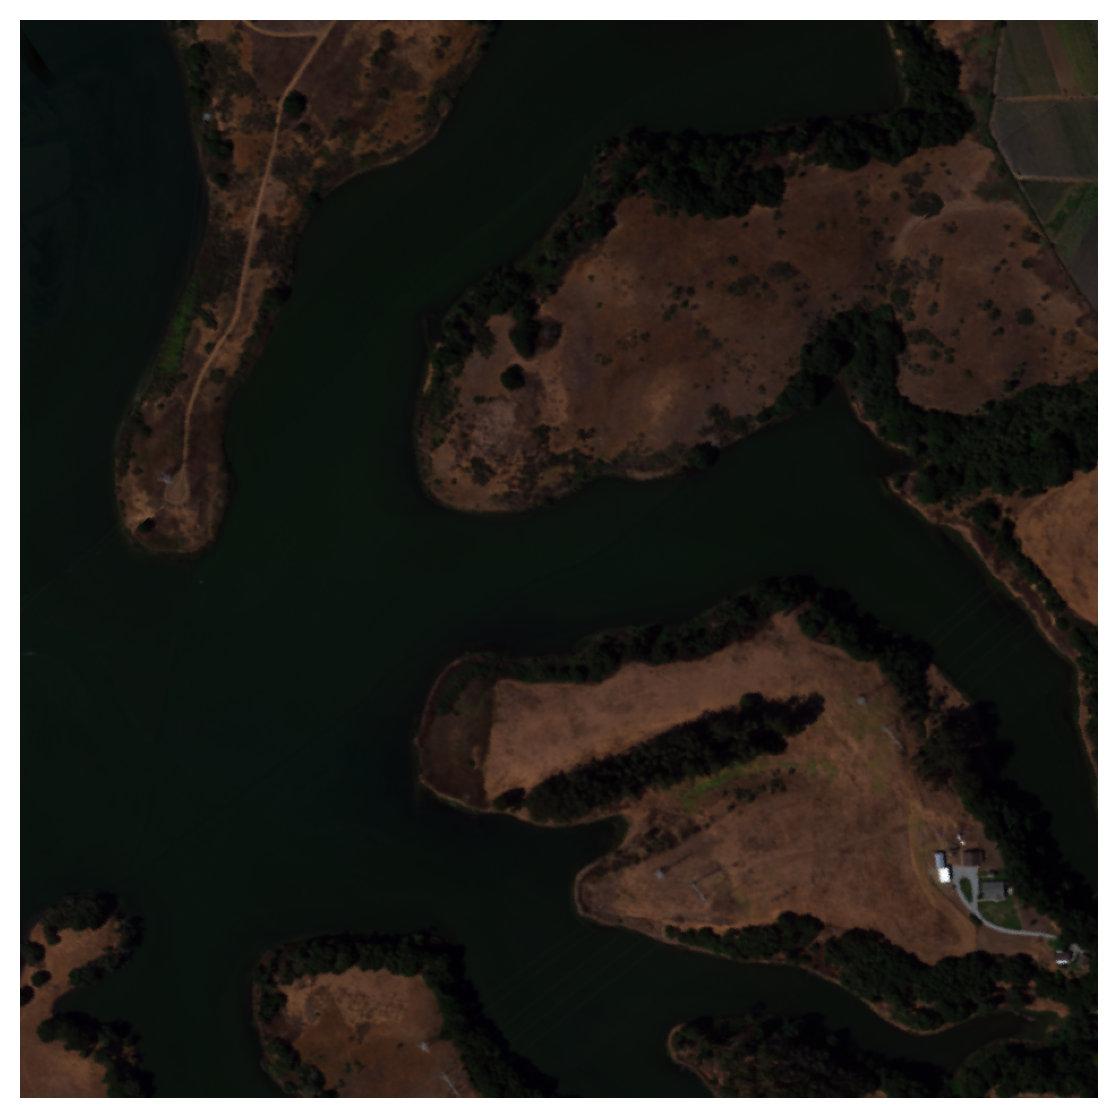

In [8]:
## Plot Image
def colorize_hsi(data, start_nm, n_bands, step_size_nm):
    """
    Colorizes a hyperspectral image using selected bands for the red, green, and blue channels.
    """
    # Calculate ending wavelength
    ending_wavelength = start_nm + (n_bands * step_size_nm)
    red_wavelength = 650  # Wavelength for red channel
    green_wavelength = 550  # Wavelength for green channel
    blue_wavelength = 450  # Wavelength for blue channel

    red_idx = int((red_wavelength - start_nm) / step_size_nm)
    green_idx = int((green_wavelength - start_nm) / step_size_nm)
    blue_idx = int((blue_wavelength - start_nm) / step_size_nm)

    norm_red_band = (data[:,:,red_idx] - np.min(data[:,:,red_idx])) / (np.max(data[:,:,red_idx]) - np.min(data[:,:,red_idx]))
    norm_green_band = (data[:,:,green_idx] - np.min(data[:,:,green_idx])) / (np.max(data[:,:,green_idx]) - np.min(data[:,:,green_idx]))
    norm_blue_band = (data[:,:,blue_idx] - np.min(data[:,:,blue_idx])) / (np.max(data[:,:,blue_idx]) - np.min(data[:,:,blue_idx]))

    regular_colorized_image = np.stack((data[:,:,red_idx], data[:,:,green_idx], data[:,:,blue_idx]), axis=-1)
    normalized_colorized_image = np.stack((norm_red_band, norm_green_band, norm_blue_band), axis=-1)
    return normalized_colorized_image, regular_colorized_image

hyperspectral_image_colorized = colorize_hsi(hyperspectral_cube, 400, 156, 3.13)[0]
fig, ax = plt.subplots(1,1, dpi=200);
ax.imshow(hyperspectral_image_colorized);
plt.axis('off');  # Turn off axis if not needed

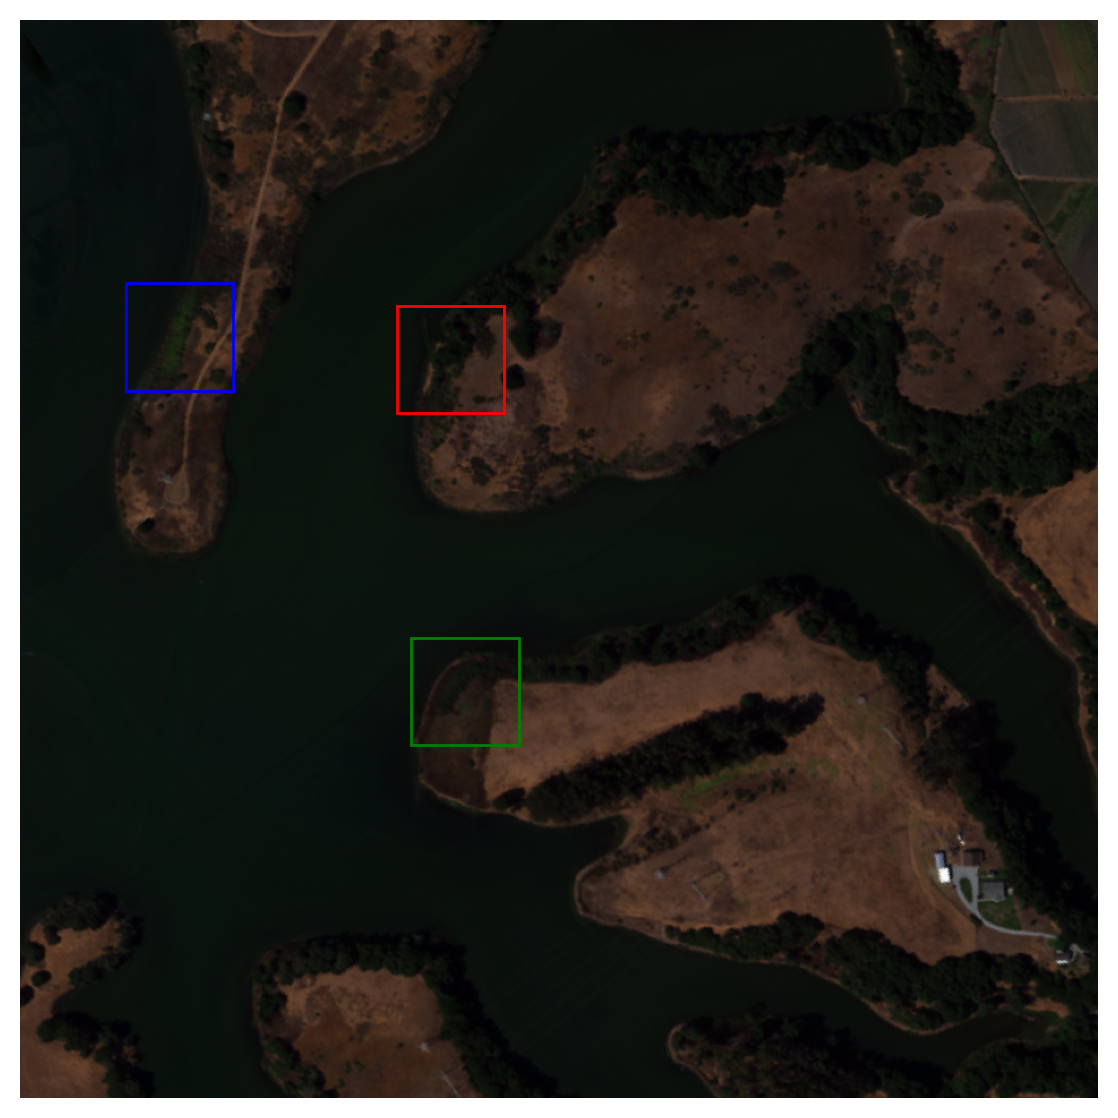

In [9]:
from matplotlib.patches import Rectangle
hyperspectral_image_colorized = colorize_hsi(hyperspectral_cube, 400, 156, 3.13)[0]
fig, ax = plt.subplots(1,1, dpi=200);
ax.imshow(hyperspectral_image_colorized);
rect_a = Rectangle((332,252),95,95,linewidth=1,edgecolor='r',facecolor='none')
rect_b = Rectangle((93,232),95,95,linewidth=1,edgecolor='b',facecolor='none')
rect_c = Rectangle((345,545),95,95,linewidth=1,edgecolor='g',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect_a);
ax.add_patch(rect_b);
ax.add_patch(rect_c);
plt.axis('off');


In [10]:
samson_a = hyperspectral_cube[252:252+95, 332: 332+95, :]
samson_b = hyperspectral_cube[232:232+95, 93:93+95, :]
samson_c = hyperspectral_cube[545:545+95, 345:345+95, :]

In [11]:
colorize_hsi(samson_a, 400, 156, 3.13).shape

AttributeError: 'tuple' object has no attribute 'shape'

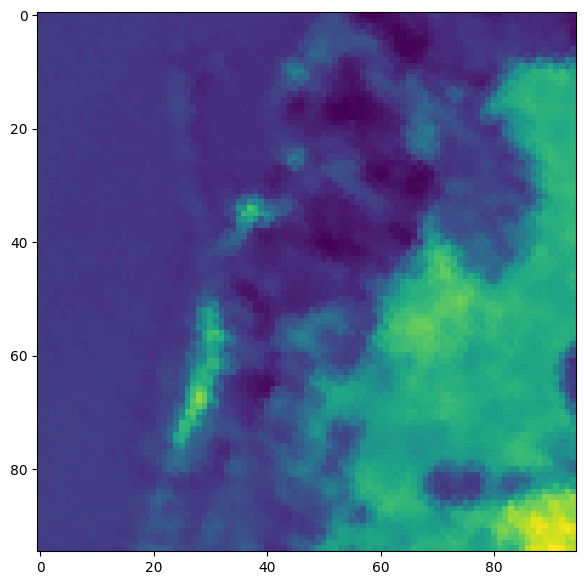

In [12]:
plt.imshow(colorize_hsi(samson_a, 400, 156, 3.13)[1][:,:,2]);

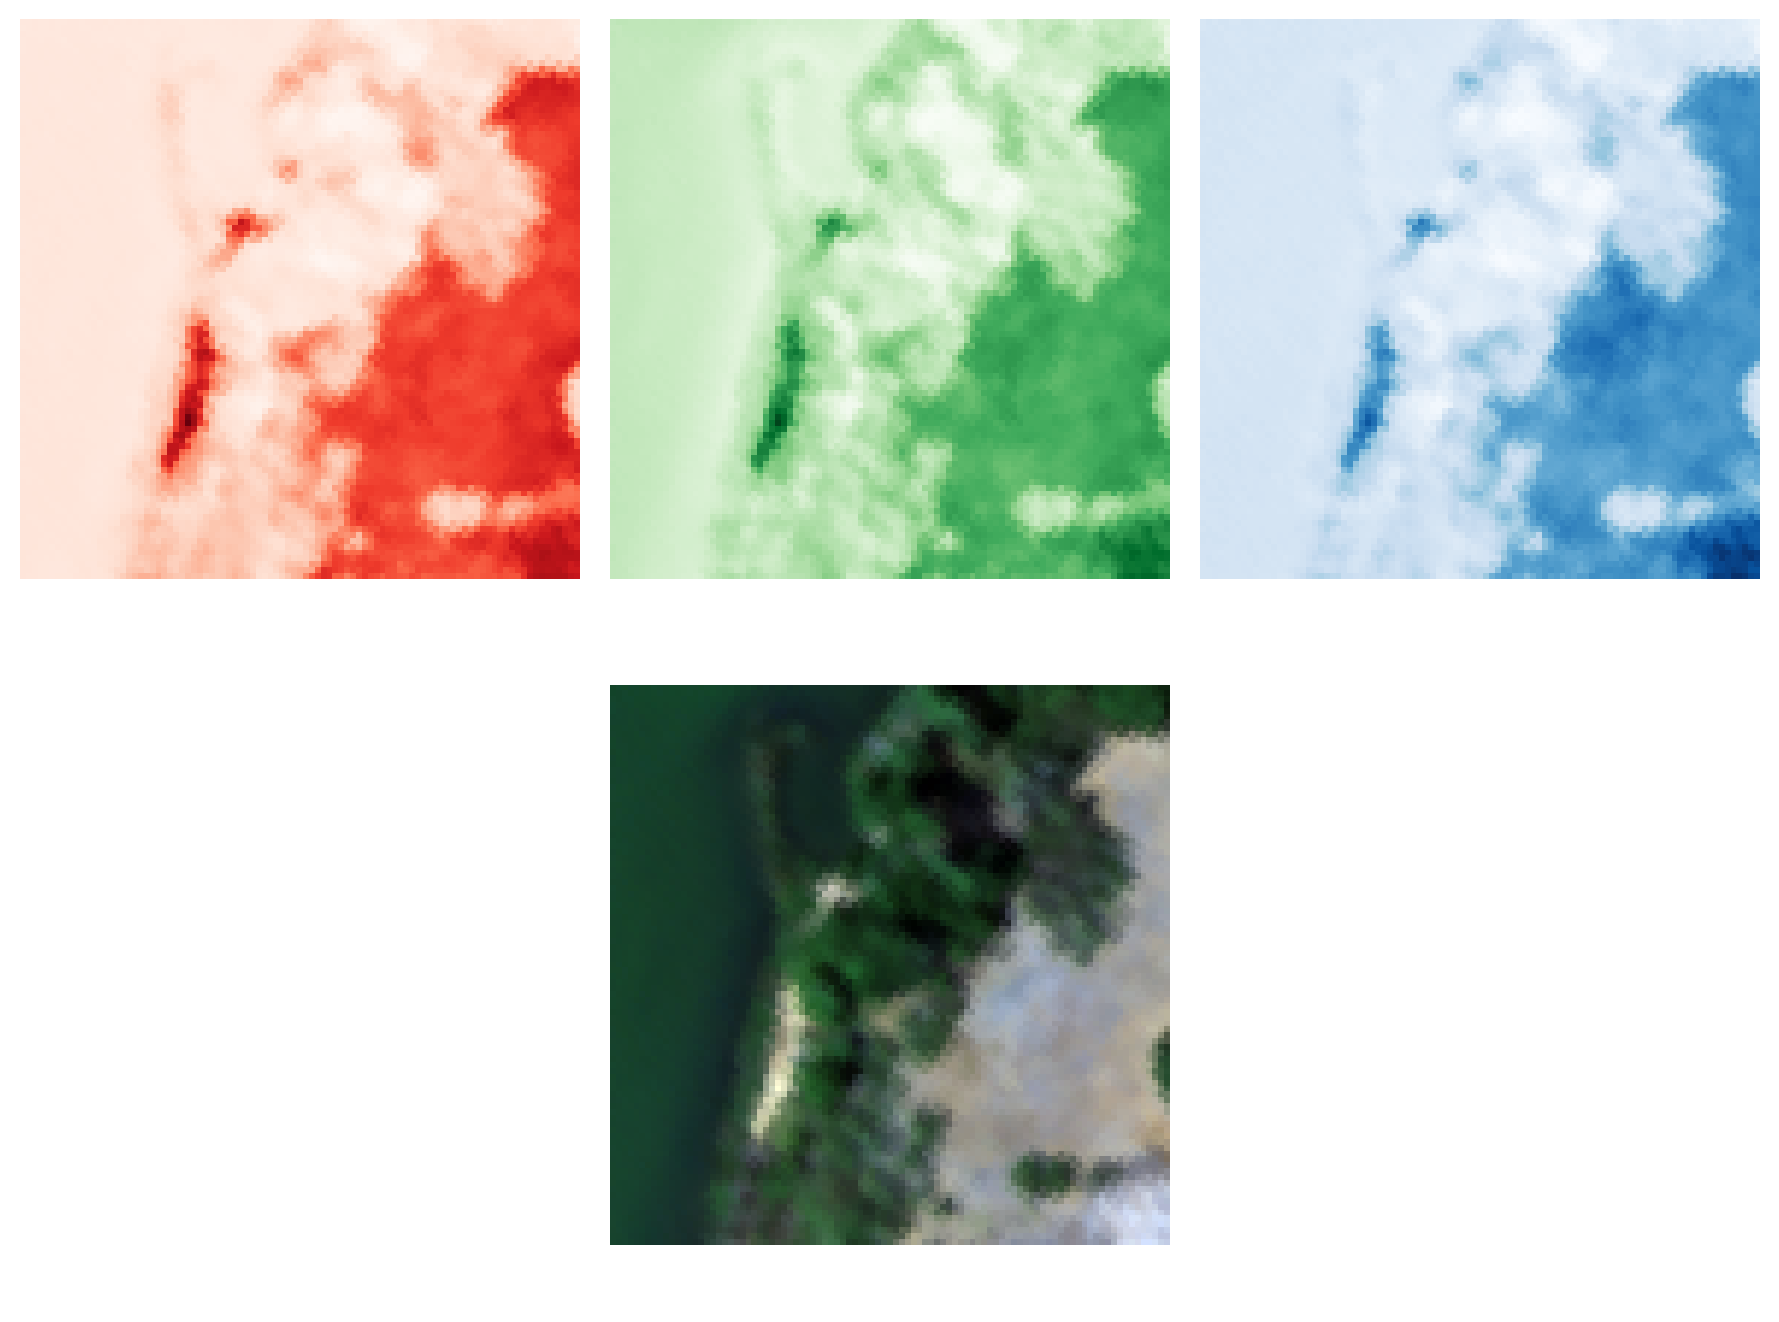

In [13]:
fig, ax = plt.subplots(2,3, dpi=200);
ax[0,0].imshow(colorize_hsi(samson_a, 400, 156, 3.13)[1][:,:,0], cmap = 'Reds');
ax[0,1].imshow(colorize_hsi(samson_a, 400, 156, 3.13)[1][:,:,1], cmap = 'Greens');
ax[0,2].imshow(colorize_hsi(samson_a, 400, 156, 3.13)[1][:,:,2], cmap = 'Blues');
ax[1,1].imshow(colorize_hsi(samson_a, 400, 156, 3.13)[0]);

ax[0,0].axis('off');
ax[0,1].axis('off');
ax[0,2].axis('off');
ax[1,1].axis('off');
ax[1,2].axis('off');
ax[1,0].axis('off');

plt.tight_layout();

In [ ]:
fig, ax = plt.subplots(1,1, dpi=100);
ax.imshow(colorize_hsi(samson_a, 400, 156, 3.13));

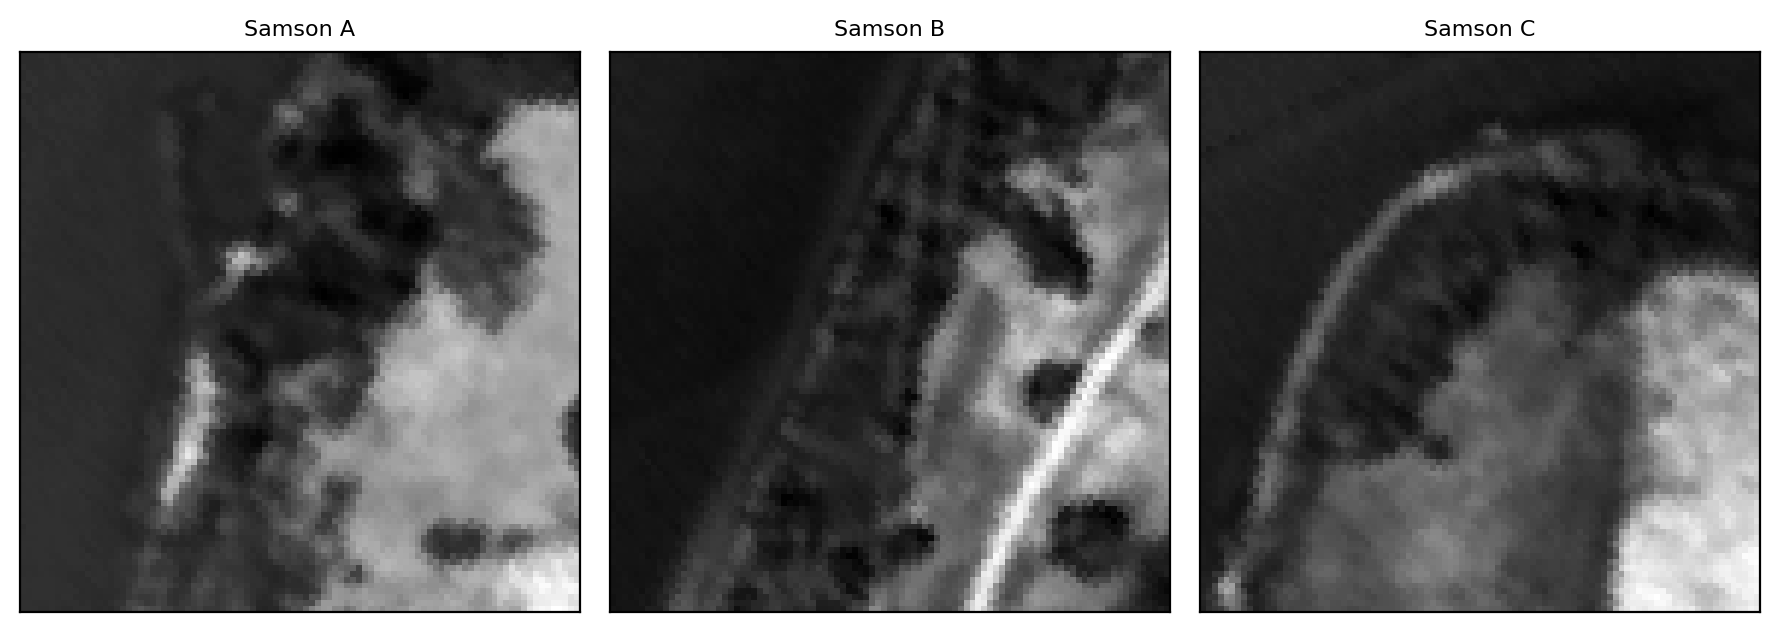

In [21]:
fig, ax = plt.subplots(1,3, dpi=200);
layer_preview = 20

ax[0].imshow(samson_a[:,:,layer_preview], cmap = 'gray');
ax[1].imshow(samson_b[:,:,layer_preview], cmap = 'gray');
ax[2].imshow(samson_c[:,:,layer_preview], cmap = 'gray');
ax[0].set_title(f'Samson A', fontsize = 8);
ax[1].set_title(f'Samson B', fontsize = 8);
ax[2].set_title(f'Samson C', fontsize = 8);

ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);
ax[2].set_xticks([]);
ax[2].set_yticks([]);

plt.tight_layout();





In [ ]:
import h5py

In [ ]:
h5_file = h5py.File('data/samson_abc.h5', 'w')
h5_file.create_dataset('samson_a', data= samson_a)
h5_file.create_dataset('samson_b', data= samson_b)
h5_file.create_dataset('samson_c', data= samson_c)
h5_file.close()